In [56]:
%matplotlib inline

In [57]:
from __future__ import division, print_function, unicode_literals
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns #visualization library
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression #problem will be solved with scikit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #linear discriminant analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #quadratic discriminant analysis

import statsmodels.api as sm #to compute p-values
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve


In [3]:
default_df=pd.read_csv('../../data/Default.csv',usecols=[i for i in range(1,5)] )

In [4]:
default_df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [5]:
default_df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [6]:
default_df['default']=default_df['default'].map({'No':0,'Yes':1})

In [7]:
feature_cols=['balance','income']
default_df.corr()

,default,balance,income
default,1.000000,0.350119,-0.019871
balance,0.350119,1.000000,-0.152243
income,-0.019871,-0.152243,1.000000


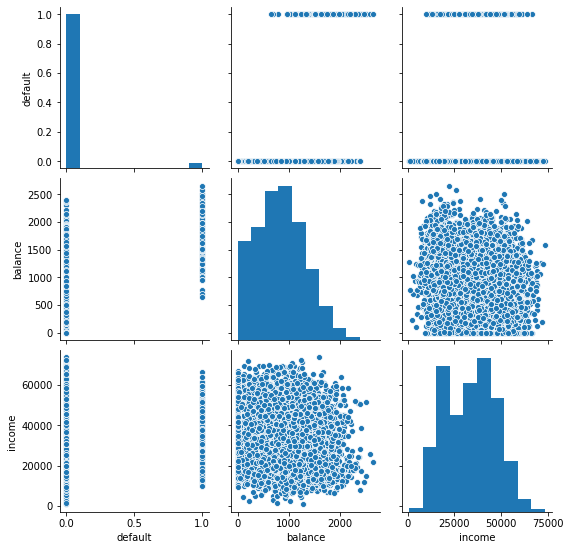

In [23]:
sns.pairplot(default_df)

In [24]:
X=default_df[feature_cols]
y=default_df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5,random_state=1)
y_train=y_train.to_frame()
y_test=y_test.to_frame()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5000, 2)
(5000, 1)
(5000, 2)
(5000, 1)


In [25]:
# Without Scalers
log_reg=LogisticRegression()
mod = log_reg.fit(X_train,y_train)
y_pred=mod.predict(X_test)
print('Confusion matrix')
matrix=confusion_matrix(y_test,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y_test,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y_test,y_pred)
print(score)

Confusion matrix
[[4839    2]
 [ 159    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4841
           1       0.00      0.00      0.00       159

    accuracy                           0.97      5000
   macro avg       0.48      0.50      0.49      5000
weighted avg       0.94      0.97      0.95      5000

Accuracy Score
0.9678


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [33]:
mod.coef_

array([[ 0.00049358, -0.00012769]])

In [29]:
y, X = dmatrices('default ~ balance + income', data=default_df, return_type='dataframe')
#logit = sm.Logit(y.ix[:,0], X) #
logit = sm.Logit(y, X) 
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 12 Sep 2020   Pseudo R-squ.:                  0.4594
Time:                        12:11:34   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0

In [40]:
# iv
err=1-(y_pred==y_test.to_numpy()).mean()
print(err)

0.03217455999999996


In [38]:
type(y_test.to_numpy())

numpy.ndarray

In [21]:
def split_and_train(size=0.25):
    X=default_df[feature_cols]
    y=default_df['default']
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=size,random_state=42)
    y_train=y_train.to_frame()
    y_test=y_test.to_frame()
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    # Without Scalers
    log_reg=LogisticRegression()
    mod = log_reg.fit(X_train,y_train)
    y_pred=mod.predict(X_test)
    print('Confusion matrix')
    matrix=confusion_matrix(y_test,y_pred)
    print(matrix)
    print('Classification Report')
    report=classification_report(y_test,y_pred)
    print(report)
    print('Accuracy Score')
    score=accuracy_score(y_test,y_pred)
    print(score)
    err=1-(y_pred==y_test.to_numpy()).mean()
    print(err)
    print()

In [22]:
import numpy 
for j in [i for i in numpy.arange(0.25, 0.5, 0.05)]:
    print('Split Size:{:2f}'.format(j))
    split_and_train(j)

Split Size:0.250000
(7500, 2)
(7500, 1)
(2500, 2)
(2500, 1)
Confusion matrix
[[2409   10]
 [  59   22]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2419
           1       0.69      0.27      0.39        81

    accuracy                           0.97      2500
   macro avg       0.83      0.63      0.69      2500
weighted avg       0.97      0.97      0.97      2500

Accuracy Score
0.9724
0.04437055999999995

Split Size:0.300000
(7000, 2)
(7000, 1)
(3000, 2)
(3000, 1)
Confusion matrix
[[2905    1]
 [  94    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2906
           1       0.00      0.00      0.00        94

    accuracy                           0.97      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.94      0.97      0.95      3000

Accuracy Score
0.9683333333333334
0.031645777777777

/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

0.034449375000000004

Split Size:0.450000
(5500, 2)
(5500, 1)
(4500, 2)
(4500, 1)
Confusion matrix
[[4337   19]
 [  96   48]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4356
           1       0.72      0.33      0.45       144

    accuracy                           0.97      4500
   macro avg       0.85      0.66      0.72      4500
weighted avg       0.97      0.97      0.97      4500

Accuracy Score
0.9744444444444444
0.04593599999999998



/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.593


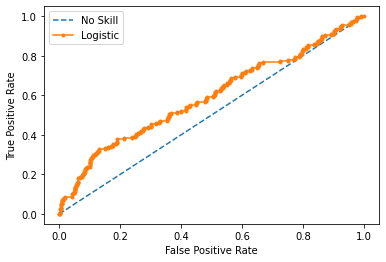

In [28]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# No Skills
ns_probs=[0 for _ in range(len(y_test))]
lr_probs=mod.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [32]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)

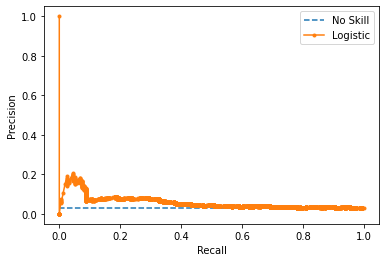

In [45]:
no_skill = len(y_test['default'][y_test['default']==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [46]:
def split_predict_plot(size=0.25):
    X=default_df[feature_cols]
    y=default_df['default']
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=size,random_state=42)
    y_train=y_train.to_frame()
    y_test=y_test.to_frame()
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    # Without Scalers
    log_reg=LogisticRegression()
    mod = log_reg.fit(X_train,y_train)
    y_pred=mod.predict(X_test)
    
    # Roc Curve
    # No Skills
    ns_probs=[0 for _ in range(len(y_test))]
    lr_probs=mod.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    ## Precision-Recall Curve
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
    no_skill = len(y_test['default'][y_test['default']==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

Split Size:0.250000
(7500, 2)
(7500, 1)
(2500, 2)
(2500, 1)
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.949


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


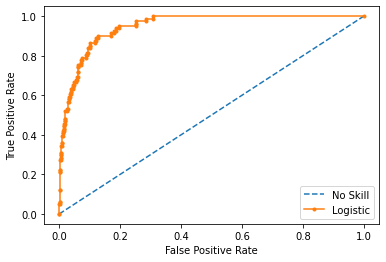

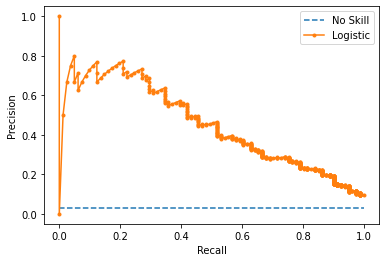

Split Size:0.300000
(7000, 2)
(7000, 1)
(3000, 2)
(3000, 1)
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.565


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


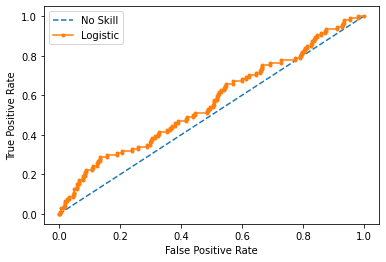

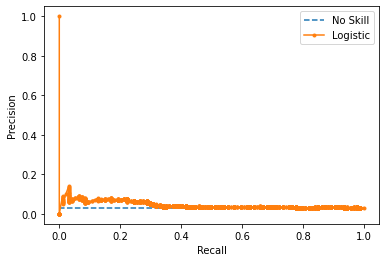

Split Size:0.350000
(6500, 2)
(6500, 1)
(3500, 2)
(3500, 1)
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.942


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


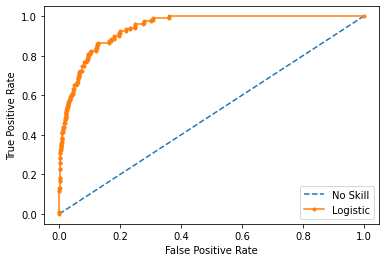

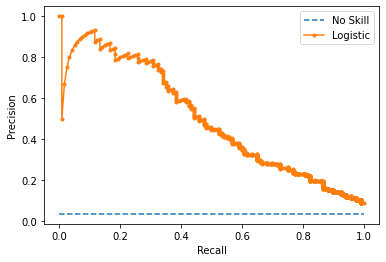

Split Size:0.400000
(6000, 2)
(6000, 1)
(4000, 2)
(4000, 1)
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.569


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


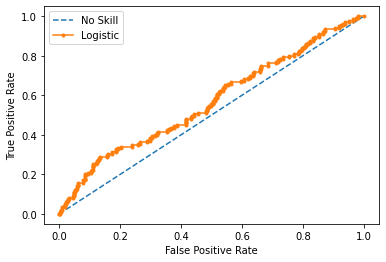

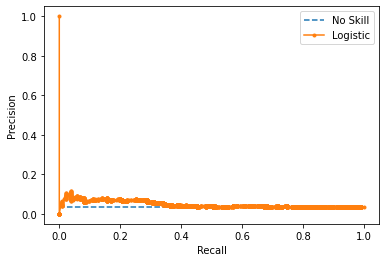

Split Size:0.450000
(5500, 2)
(5500, 1)
(4500, 2)
(4500, 1)
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.945


/opt/anaconda3/envs/AI-Notebooks/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


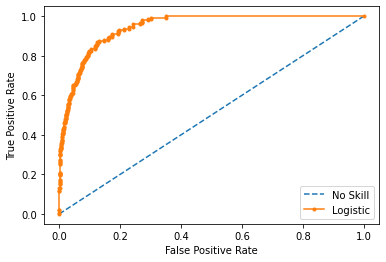

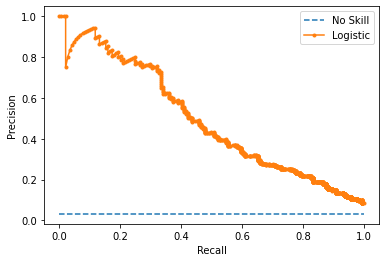

In [47]:
import numpy 
for j in [i for i in numpy.arange(0.25, 0.5, 0.05)]:
    print('Split Size:{:2f}'.format(j))
    split_predict_plot(j)

### (d)

In [49]:
default_df['yes_student']=(default_df['student'] == 'Yes').astype('int')
default_df

,default,student,balance,income,yes_student
0,0,No,729.526495,44361.625074,0
1,0,Yes,817.180407,12106.134700,1
2,0,No,1073.549164,31767.138947,0
3,0,No,529.250605,35704.493935,0
4,0,No,785.655883,38463.495879,0
...,...,...,...,...,...
9995,0,No,711.555020,52992.378914,0
9996,0,No,757.962918,19660.721768,0
9997,0,No,845.411989,58636.156984,0
9998,0,No,1569.009053,36669.112365,0


In [54]:
X = default_df[['income','balance','yes_student']]
y = default_df['default']

f = 'default ~ income + balance + yes_student'

X_train, X_test, y_train, y_test = train_test_split(X, y)
train = X_train.join(y_train)

logit = sm.Logit(y, X) 
logit = sm.Logit(y, X) 
result = logit.fit()
print(result.summary())
y_pred = (result.predict(X_test) > .5) * 1
C = confusion_matrix(y_test, y_pred)
print(C)

Optimization terminated successfully.
         Current function value: 0.124277
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 12 Sep 2020   Pseudo R-squ.:                  0.1490
Time:                        17:26:09   Log-Likelihood:                -1242.8
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 3.274e-95
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
income         -0.0002   5.18e-06    -33.672      0.000      -0.000      -0.000
balance         0.0028    

### 5.7

In [58]:
weekly_df=pd.read_csv('../../data/Weekly.csv')

In [59]:
weekly_df['Direction_up']=(weekly_df['Direction']=='Up').astype(int)

In [60]:
weekly_df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1
...,...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up,1


In [65]:
feature_cols=['Lag1','Lag2']
X=weekly_df[feature_cols]
y=weekly_df['Direction_up']
# Without Scalers
log_reg=LogisticRegression()
mod = log_reg.fit(X,y)
y_pred=mod.predict(X)
print('Confusion matrix')
matrix=confusion_matrix(y,y_pred)
print(matrix)
print('Classification Report')
report=classification_report(y,y_pred)
print(report)
print('Accuracy Score')
score=accuracy_score(y,y_pred)
print(score)
print('Intercept,Coeff')
print(mod.intercept_,mod.coef_)

Confusion matrix
[[ 37 447]
 [ 38 567]]
Classification Report
              precision    recall  f1-score   support

           0       0.49      0.08      0.13       484
           1       0.56      0.94      0.70       605

    accuracy                           0.55      1089
   macro avg       0.53      0.51      0.42      1089
weighted avg       0.53      0.55      0.45      1089

Accuracy Score
0.5546372819100092
Intercept,Coeff
[0.22122502] [[-0.03869814  0.06020749]]


#### (b)

In [69]:
# Leave first value
mod.fit(X.iloc[1:],y.iloc[1:])
y_pred=mod.predict(X)
print('Accuracy Score')
score=accuracy_score(y,y_pred)
print(score)
print('Intercept,Coeff')
print(mod.intercept_,mod.coef_)

Accuracy Score
0.5564738292011019
Intercept,Coeff
[0.22324404] [[-0.03840931  0.06080633]]


#### (c)

In [86]:
y_pred=mod.predict([X.iloc[0]])
print('Accuracy Score')
score=accuracy_score([y[0]],y_pred)
print(score)

Accuracy Score
0.0


#### Looks like this observation is clearly misclassified.

#### (d)

In [91]:
n=len(X)
errors=np.zeros(n)
for i in range(n):
    #print('Currently working on {}'.format(i))
    i_out=~X.index.isin([i])
   # print('Leaving out {} values={}'.format(i,i_out))
    mod.fit(X[i_out],y[i_out])
    i_output=[mod.predict([X.iloc[i]])]
    #print("Predicted Value={} Actual value={}" .format(i_output,y[i]))
    if i_output!=y[i]:
        errors[i]=1

print(len(errors))
    

[1. 1. 0. ... 0. 0. 0.]


#### (e)

In [92]:
cnt=sum(1 for s in errors if s==1)

In [96]:
print('Error Rate:{}'.format(cnt/len(errors)))

Error Rate:0.44995408631772266
